In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/fake-news US Dataset/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

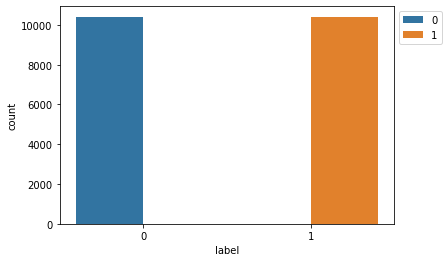

In [ ]:
sns.countplot(x='label',hue='label',data=df)
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
df=df[['id','title','label']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 487.6+ KB


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20242 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 632.6+ KB


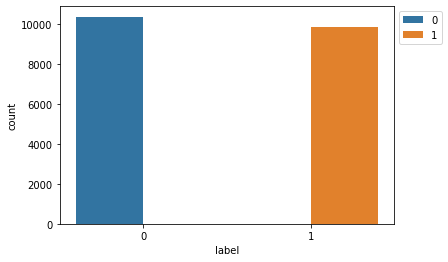

In [ ]:
sns.countplot(x='label',hue='label',data=df)
plt.legend(bbox_to_anchor=(1,1))


In [ ]:
df.head()

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


In [ ]:
df.reset_index(inplace=True)

In [ ]:
nltk.download('stopwords')
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
for i in range(len(df)):
  #remove all other char except a-z and A-Z
  sent=re.sub('[^a-zA-z]',' ',df['title'][i])

  #Convert into Lower Casing
  sent=sent.lower()

  #Steamming
  sent=" ".join([stemmer.stem(word) for word in str(sent).split()])

  #Remove Stopword
  sent=" ".join([word for word in str(sent).split() if(word not in stop_words)])
  corpus.append(sent)
#corpus


In [ ]:
#Stem+BOW
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()
#output
y=df['label']

In [ ]:
temp_df=pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,ab,abandon,abba,abc,abduct,abe,abedin,abl,aboard,...,yr,zealand,zen,zero,zika,zionist,zone,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# split data into traning and testing
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (16193, 5000)
X_test:- (4049, 5000)
y_train:- (16193,)
y_test:- (4049,)


In [ ]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))

    sns.heatmap(cm,annot=True,cmap="YlGnBu")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")

model created
model traning completed
y_pred completed
ACC for =3:- 80.26673252654976
Accuracy :- 0.8026673252654977
Error rate :- 0.19733267473450233
Precision:- 0.8584541797081081
Recall:-  0.8026673252654977
F1 score :-  0.7964745226495676
[[1307  794]
 [   5 1943]]


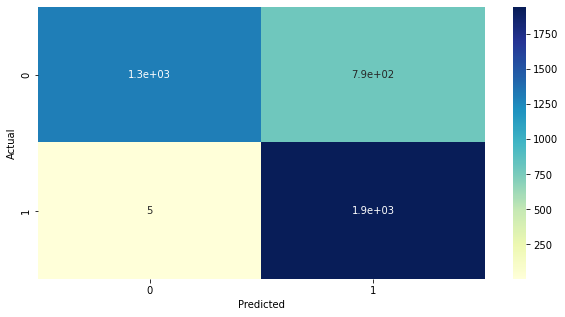

In [ ]:
# create a model k=3,distance=manhatten_distance
from sklearn.neighbors import KNeighborsClassifier
ML_model=KNeighborsClassifier(n_neighbors=3)
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("ACC for =3:-",acc*100)

#model Evaluation
model_Eval(y_test,y_pred)

model created
model traning completed
y_pred completed
Accuracy :- 0.766115090145715
Error rate :- 0.233884909854285
Precision:- 0.7702054123921548
Recall:-  0.766115090145715
F1 score :-  0.7659088324760728
[[1518  583]
 [ 364 1584]]


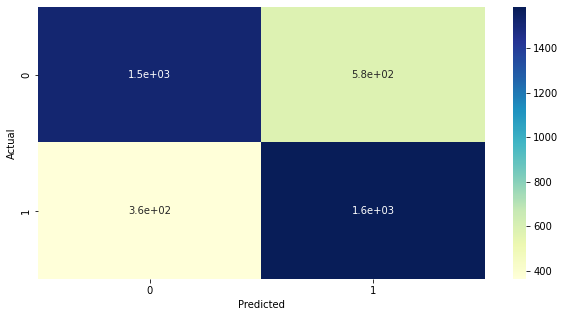

In [ ]:
# create a model NB
from sklearn.naive_bayes import GaussianNB
ML_model=GaussianNB()
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")
#model Evaluation
model_Eval(y_test,y_pred)

model completed
Model traning completed
y_pred completed
Accuracy :- 0.9318350209928378
Error rate :- 0.06816497900716223
Precision:- 0.9345336641945698
Recall:-  0.9318350209928378
F1 score :-  0.9318343806884186
[[1886  215]
 [  61 1887]]


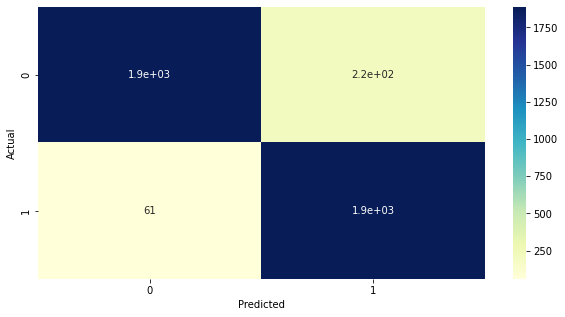

In [ ]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ML_Model=LogisticRegression()
print("model completed")

# model traning
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# LR Eval
model_Eval(y_test,y_pred)

#SVM

Model created
Model traning completed
y_pred completed
Accuracy :- 0.9296122499382563
Error rate :- 0.07038775006174369
Precision:- 0.9307260453203534
Recall:-  0.9296122499382563
F1 score :-  0.9296355761585534
[[1910  191]
 [  94 1854]]


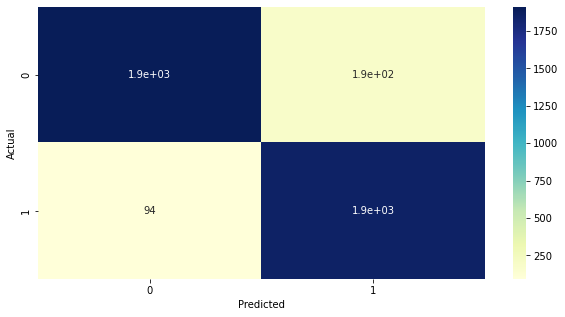

In [ ]:
# create Model for SVM (liner)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#model creation
ML_Model=SVC(kernel="linear")
print("Model created")

# model training
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# model evaluation
model_Eval(y_test,y_pred)

model created
model traning completd
y_pred find
Accuracy :- 0.9083724376389232
Error rate :- 0.09162756236107683
Precision:- 0.9224033169548453
Recall:-  0.9083724376389232
F1 score :-  0.9079452425017336
[[1734  367]
 [   4 1944]]


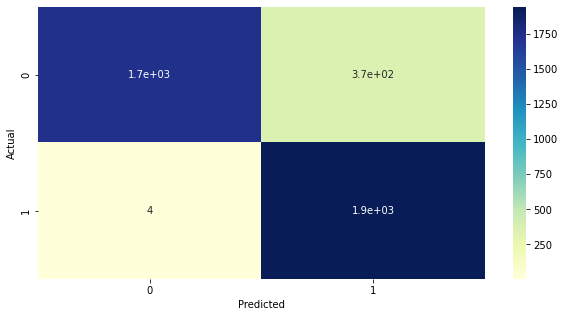

In [ ]:
# created Model for svm (poly)

#model creation
ML_Model=SVC(kernel="poly")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
# model evaluation
model_Eval(y_test,y_pred)

model created
model traning completd
y_pred find
Accuracy :- 0.9271425043220548
Error rate :- 0.0728574956779452
Precision:- 0.9341012885650287
Recall:-  0.9271425043220548
F1 score :-  0.9270331255681596
[[1828  273]
 [  22 1926]]


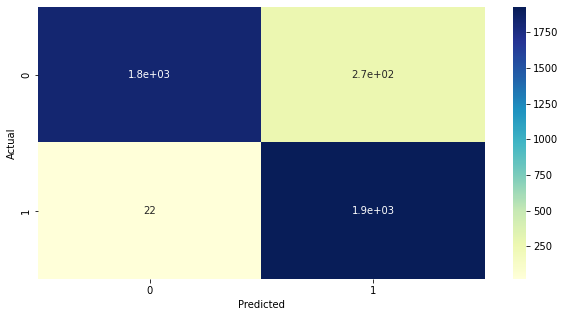

In [ ]:
# created Model for svm (rbf)

#model creation
ML_Model=SVC(kernel="rbf")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  92.12151148431712
Accuracy :- 0.9212151148431712
Error rate :- 0.0787848851568288
Precision:- 0.9215574713246183
Recall:-  0.9212151148431712
F1 score :-  0.9212401294334807
[[1916  185]
 [ 134 1814]]


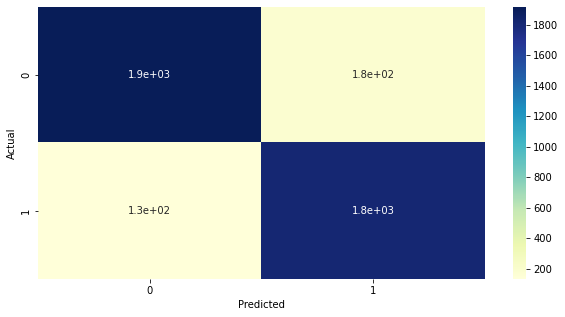

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# model creation
ML_Model=DecisionTreeClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  78.2168436651025
Accuracy :- 0.782168436651025
Error rate :- 0.21783156334897502
Precision:- 0.8246080372924547
Recall:-  0.782168436651025
F1 score :-  0.7767067655434452
[[1302  799]
 [  83 1865]]


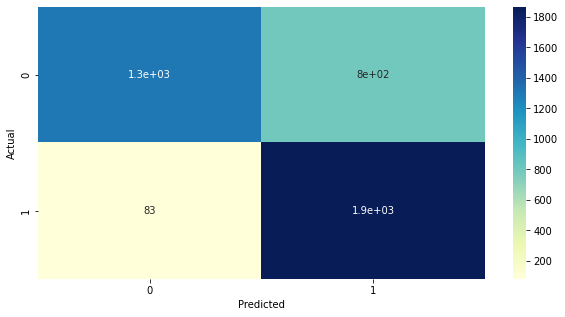

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# model creation
ML_Model=RandomForestClassifier(max_depth=2)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  92.29439367745123
Accuracy :- 0.9229439367745123
Error rate :- 0.07705606322548775
Precision:- 0.9275500581095847
Recall:-  0.9229439367745123
F1 score :-  0.922895028705734
[[1843  258]
 [  54 1894]]


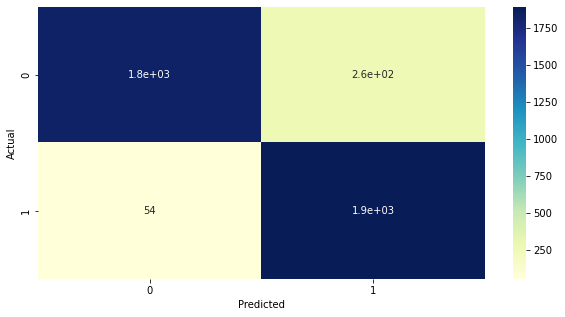

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=100, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  91.03482341318843
Accuracy :- 0.9103482341318844
Error rate :- 0.08965176586811563
Precision:- 0.9233626267724061
Recall:-  0.9103482341318844
F1 score :-  0.9099732925192306
[[1745  356]
 [   7 1941]]


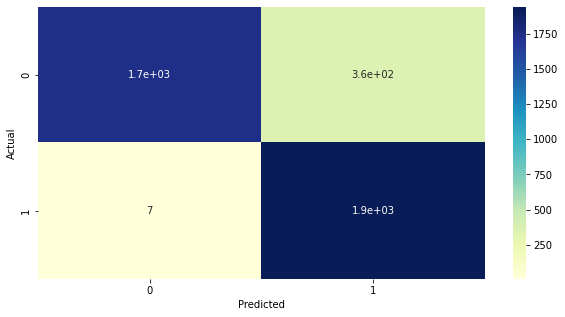

In [ ]:
#XGBoost
import xgboost as xgb

# model creation
ML_Model=xgb.XGBClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

#Lemetization and TFIDF

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
corpus=[]
for i in range(len(df)):
  #remove all other char except a-z and A-Z
  sent=re.sub('[^a-zA-z]',' ',df['title'][i])

  #Convert into Lower Casing
  sent=sent.lower()

  #Lemmitizing
  sent=" ".join([lemmatizer.lemmatize(word) for word in str(sent).split()])

  #Remove Stopword
  sent=" ".join([word for word in str(sent).split() if(word not in stop_words)])
  corpus.append(sent)
#corpus


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#Lemmatizer+TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()
X
#output
y=df['label']

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Fake News Classifier

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Fake News Classifier


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Fake News Classifier


In [ ]:
import joblib
joblib.dump(cv,"cv.pkl")
print("saved")

saved


In [ ]:
temp_df=pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,ab,abandon,abandoned,abbas,abc,abduction,abe,abedin,able,...,yr,zealand,zen,zero,zika,zionist,zone,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# split data into traning and testing
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (16193, 5000)
X_test:- (4049, 5000)
y_train:- (16193,)
y_test:- (4049,)


model created
model traning completed
y_pred completed
ACC for =3:- 52.95134601136083
Accuracy :- 0.5295134601136083
Error rate :- 0.47048653988639166
Precision:- 0.7181855160880362
Recall:-  0.5295134601136083
F1 score :-  0.41793683729879455
[[ 216 1885]
 [  20 1928]]


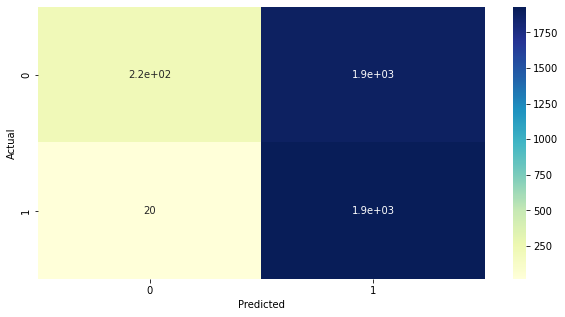

In [ ]:
# create a model k=3,distance=manhatten_distance
from sklearn.neighbors import KNeighborsClassifier
ML_model=KNeighborsClassifier(n_neighbors=3)
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("ACC for =3:-",acc*100)

#model Evaluation
model_Eval(y_test,y_pred)

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Fake News Classifier


In [ ]:
joblib.dump(ML_model,"KNN_Model.pkl")
print("saved")

saved


model created
model traning completed
y_pred completed
Accuracy :- 0.7636453445295135
Error rate :- 0.2363546554704865
Precision:- 0.7646450636035714
Recall:-  0.7636453445295135
F1 score :-  0.7637247973519092
[[1575  526]
 [ 431 1517]]


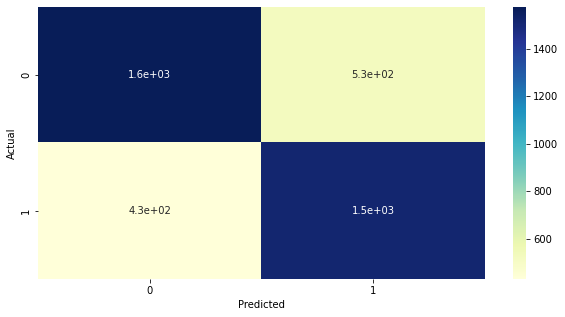

In [ ]:
# create a model NB
from sklearn.naive_bayes import GaussianNB
ML_model=GaussianNB()
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")
#model Evaluation
model_Eval(y_test,y_pred)

In [ ]:
joblib.dump(ML_model,"NB_Model.pkl")
print("saved")

saved


model completed
Model traning completed
y_pred completed
Accuracy :- 0.9199802420350703
Error rate :- 0.08001975796492966
Precision:- 0.9267011405667273
Recall:-  0.9199802420350703
F1 score :-  0.9198651842239068
[[1815  286]
 [  38 1910]]


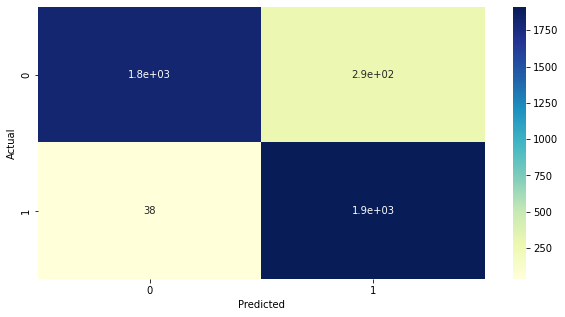

In [ ]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ML_Model=LogisticRegression()
print("model completed")

# model traning
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# LR Eval
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"LogisticRegression_Model.pkl")
print("saved")

saved


Model created
Model traning completed
y_pred completed
Accuracy :- 0.9293652753766362
Error rate :- 0.07063472462336384
Precision:- 0.9334936795288205
Recall:-  0.9293652753766362
F1 score :-  0.9293330105874119
[[1862  239]
 [  47 1901]]


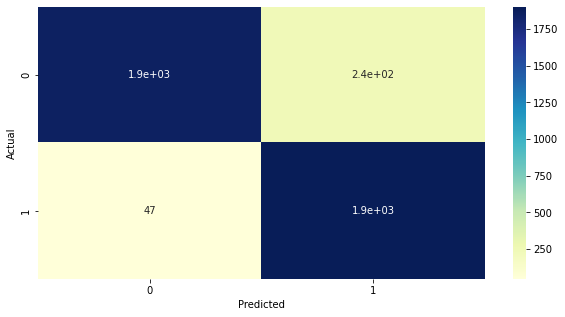

In [ ]:
# create Model for SVM (liner)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#model creation
ML_Model=SVC(kernel="linear")
print("Model created")

# model training
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"SVM_linear_Model.pkl")
print("saved")

saved


model created
model traning completd
y_pred find
Accuracy :- 0.9096073104470239
Error rate :- 0.09039268955297608
Precision:- 0.9111483792909864
Recall:-  0.9096073104470239
F1 score :-  0.9096309769306593
[[1860  241]
 [ 125 1823]]


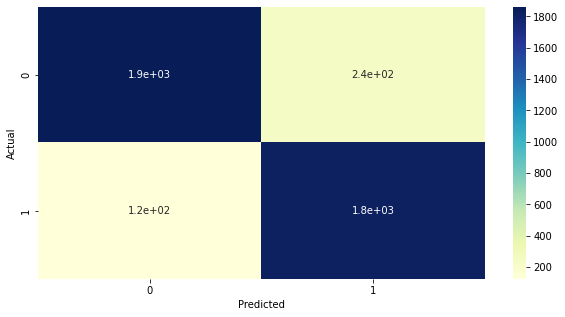

In [ ]:
# created Model for svm (poly)

#model creation
ML_Model=SVC(kernel="poly")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
ML_Model

SVC(kernel='poly')

In [ ]:
joblib.dump(ML_Model,"SVM_poly_Model.pkl")
print("saved")

saved


model created
model traning completd
y_pred find
Accuracy :- 0.9226969622128921
Error rate :- 0.0773030377871079
Precision:- 0.9299370958156812
Recall:-  0.9226969622128921
F1 score :-  0.9225708508890289
[[1816  285]
 [  28 1920]]


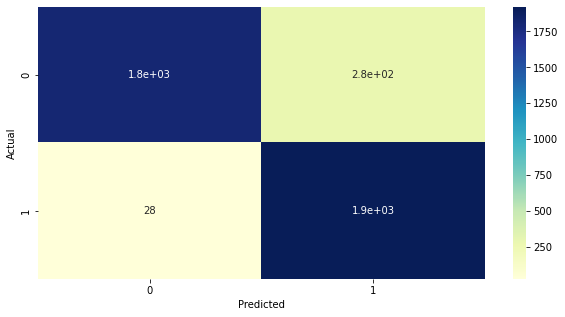

In [ ]:
# created Model for svm (rbf)

#model creation
ML_Model=SVC(kernel="rbf")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
joblib.dump(ML_Model,"SVM_rbf_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  91.55346999259076
Accuracy :- 0.9155346999259076
Error rate :- 0.08446530007409236
Precision:- 0.9157410822497773
Recall:-  0.9155346999259076
F1 score :-  0.9155572327014131
[[1911  190]
 [ 152 1796]]


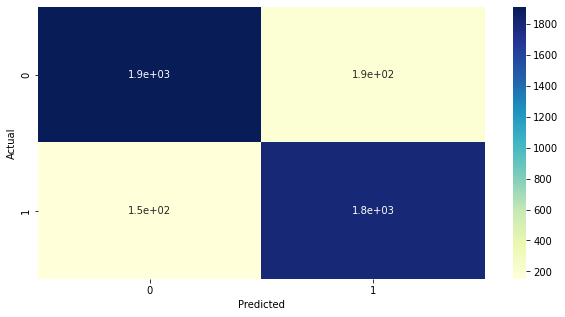

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# model creation
ML_Model=DecisionTreeClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:

joblib.dump(ML_Model,"DT_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  87.60187700666832
Accuracy :- 0.8760187700666832
Error rate :- 0.12398122993331684
Precision:- 0.8880151640419011
Recall:-  0.8760187700666832
F1 score :-  0.875512617249097
[[1677  424]
 [  78 1870]]


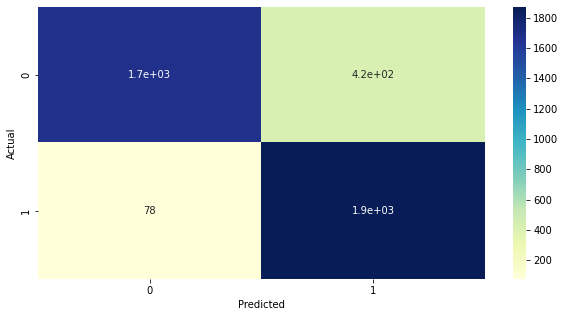

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# model creation
ML_Model=RandomForestClassifier(max_depth=2)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"RFC_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  92.14620894047914
Accuracy :- 0.9214620894047914
Error rate :- 0.07853791059520865
Precision:- 0.925223859556624
Recall:-  0.9214620894047914
F1 score :-  0.9214347626056548
[[1850  251]
 [  67 1881]]


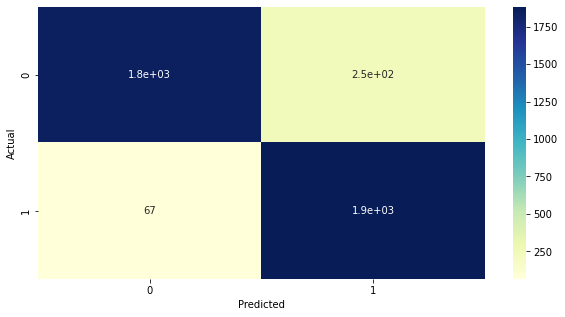

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=100, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_Model,"ADB_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  91.13361323783651
Accuracy :- 0.9113361323783651
Error rate :- 0.08866386762163492
Precision:- 0.9240765377823873
Recall:-  0.9113361323783651
F1 score :-  0.9109770872121363
[[1749  352]
 [   7 1941]]


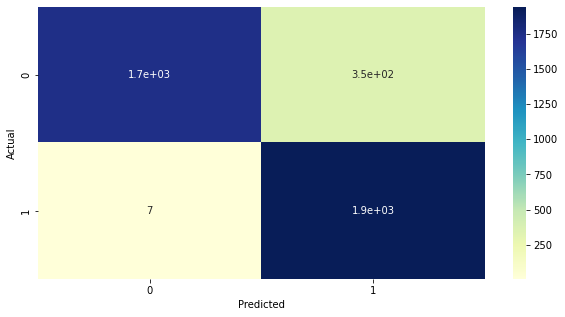

In [ ]:
#XGBoost
import xgboost as xgb

# model creation
ML_Model=xgb.XGBClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
joblib.dump(ML_Model,"XGB_Model.pkl")
print("saved")

saved
